### Sales Analysis

Import Necessary Libraries

In [1]:
import pandas as pd
import os

### Task#1:Merging 12 months of sales data into a single CSV file

In [5]:
import pandas as pd
import os
#df = pd.read_csv("D:\\Manasvi\\Development\\Python\\Python project\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_April_2019.csv")

cleansedPath = "../datasets/cleansed"
inputPath = "../datasets/input"
input_absolute_path = os.path.abspath(inputPath)
cleansed_absolute_path = os.path.abspath(cleansedPath)

# print(absolute_path)

files =[file for file in os.listdir(input_absolute_path)]
#print(files)

all_months_data = pd.DataFrame()

for file in files:
#     print(absolute_path + "\\"+ file);
    df = pd.read_csv(input_absolute_path + "\\" + file)

    all_months_data = pd.concat([all_months_data,df])
    
# #all_months_data.head()

#     #print(all_months_data.head())

all_months_data.to_csv(cleansed_absolute_path + "\\" +"all_data1.csv",index=False)

    

In [11]:
import pandas as pd
import os

all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("D:\\Manasvi\\Development\\Python\\Python project\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\" + file)
    
    all_months_data = pd.concat([all_months_data,df])
    all_months_data.to_csv("all_data.csv",index=False)

### Read in updated dataframe

In [12]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Question 1: What was the best months for sales? How much was earned that month?

##### Augument data with additional columns like months and sales should have separate column


#### Task 2: Add Month column

In [22]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


### Clean data

#### Drop rows that have NaN (not a number)

In [15]:
nan_df = all_data[all_data.isna().any(axis=1)]


all_data = all_data.dropna(how='all')

#nan_df.head()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find 'Or' and delete it because it is causing an error to add month column code

In [13]:
temp_df = all_data[all_data['Order Date'].str[0:2] =='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
all_data= all_data[all_data['Order Date'].str[0:2] !='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Task 3: Add a sales column as per quest:1

In [18]:
all_data['Sales']= all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


#### Convert columns to correct type

In [17]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make it an Int
all_data['Price Each'] =pd.to_numeric(all_data['Price Each']) #make it a Float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [23]:
all_data.groupby('Month').sum()['Sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

#### Solving Question 1:

In [ ]:
all_data.groupby('Month').sum()

#### Plot these values

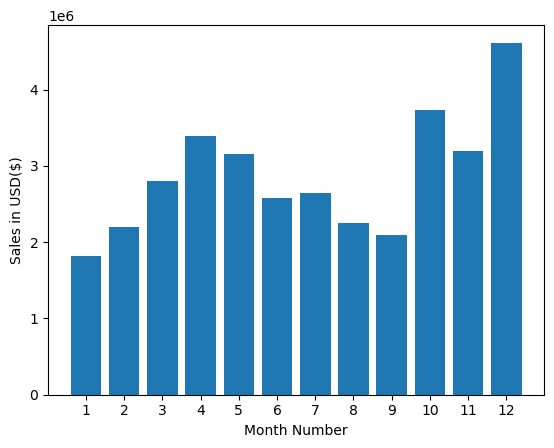

In [24]:
import matplotlib.pyplot as plt

months = range(1,13)
results = all_data.groupby('Month').sum()

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month Number')

plt.show()



In [25]:
Selected_columns = all_data[['Month', 'Price Each', 'Quantity Ordered', 'Sales']]
grouped_data = Selected_columns.groupby('Month').sum()
#Selected_columns.head()

print(grouped_data)

       Price Each  Quantity Ordered       Sales
Month                                          
1      1811768.38             10903  1822256.73
2      2188884.72             13449  2202022.42
3      2791207.83             17005  2807100.38
4      3367671.02             20558  3390670.24
5      3135125.13             18667  3152606.75
6      2562025.61             15253  2577802.26
7      2632539.56             16072  2647775.76
8      2230345.42             13448  2244467.88
9      2084992.09             13109  2097560.13
10     3715554.83             22703  3736726.88
11     3180600.68             19798  3199603.20
12     4588415.41             28114  4613443.34


### Question 2 :  Which city has the highest number of sales?

#### Augument data with additional column City

#### Task 4: Add City column

### using .apply() function

In [33]:


#all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
#all_data['City'] = all_data['City'].astype('char')
#all_data.head()
#all_data = all_data.drop(columns='city')    #if you want to drop a column
#or we can use this method

def get_city(address):
    return address.split(',')[1]

#def get_state(address):
    #return address.split(',')[2]        #gives zip code also


def get_state(address):
    return address.split(',')[2].split(' ')[1]

#all_data['City']= all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) +')')
# or we can use f string instead of + 
all_data['City']= all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)


#### Solving Question 2

In [31]:
results_city = all_data.groupby('City').sum()[['Month', 'Price Each', 'Quantity Ordered', 'Sales']]
results_city

,Month,Price Each,Quantity Ordered,Sales
City,,,,
Atlanta (GA),104794,2779908.20,16602,2795498.58
Austin (TX),69829,1809873.61,11153,1819581.75
Boston (MA),141112,3637409.77,22528,3661642.01
Dallas (TX),104620,2752627.82,16730,2767975.40
Los Angeles (CA),208325,5421435.23,33289,5452570.80
New York City (NY),175741,4635370.83,27932,4664317.43
Portland (ME),17144,447189.25,2750,449758.27
Portland (OR),70621,1860558.22,11303,1870732.34
San Francisco (CA),315520,8211461.74,50239,8262203.91


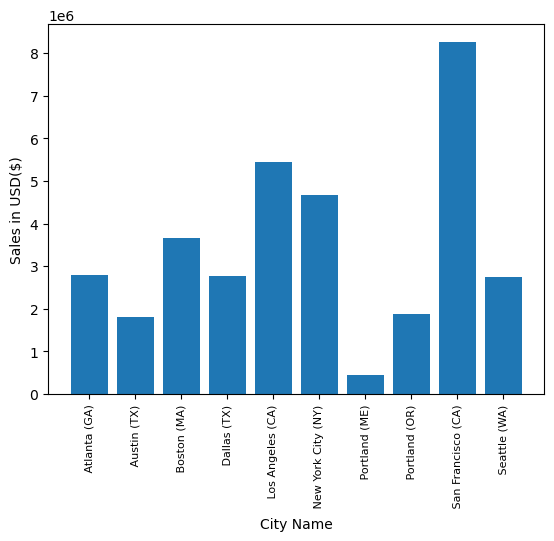

In [35]:
import matplotlib.pyplot as plt

#cities = all_data['City'].unique()

results = all_data.groupby('City').sum()
cities =[city for city, df in all_data.groupby('City')]

plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation ='vertical', size=8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City Name')

plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [ ]:
all_data.head()

#### Convert the order date format from string to date time

In [36]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'],format='%m/%d/%y %H:%M')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)


#### Add Hour column

In [37]:
all_data['Hour']= all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),9,27


#### Solving question 3

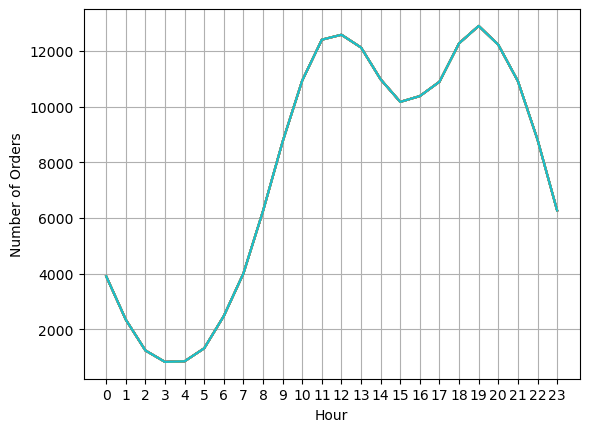

In [38]:
Hours =[hour for hour, df in all_data.groupby('Hour')]

plt.plot(Hours,all_data.groupby(['Hour']).count())
plt.xticks(Hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#my recommendation is around 11am (11) or 7pm (19)

#### Questionn 4: What products are most often sold together

In [ ]:
all_data.head()

#### Find dupicate order id's in order to see what products are sold together

In [39]:
df = all_data[all_data['Order ID'].duplicated(keep= False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,Boston (MA),11,31


#### Create new column to group order id's 

In [40]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()

df.head()

C:\Users\manas\AppData\Local\Temp\ipykernel_21476\3548987948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


#### Solving question 4

#### for this we need to have new packages 

In [44]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)    


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### Question 5: What product sold the most ? why do you think it sold the most?

In [45]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),9,27


In [53]:
product_group = all_data.groupby('Product')
quantity_ordered= product_group['Quantity Ordered'].sum()
print(quantity_ordered)

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64


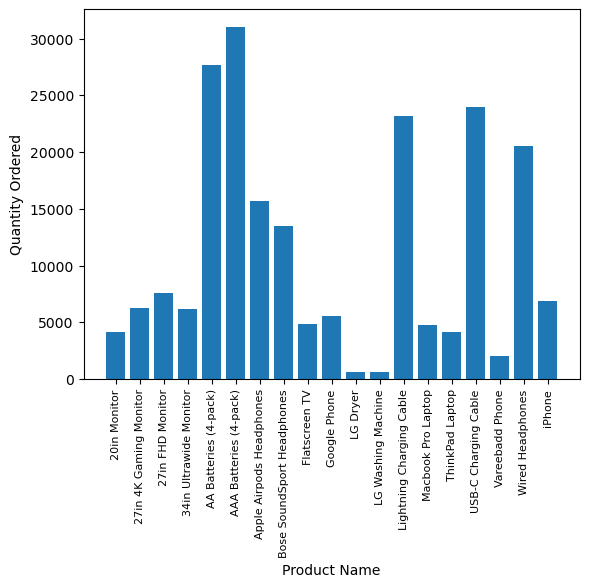

In [56]:
product_group = all_data.groupby('Product')
quantity_ordered= product_group['Quantity Ordered'].sum()
products =[product for product, df in product_group]

plt.bar(products,quantity_ordered)
plt.xticks(products, rotation ='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product Name')

plt.show()

#### Part 2 of quest 5: why do you think it sold the most?

In [67]:
# Display unique values in the 'Product' column
print(all_data['Product'].unique())


['USB-C Charging Cable' 'Bose SoundSport Headphones' 'Google Phone'
 'Wired Headphones' 'Macbook Pro Laptop' 'Lightning Charging Cable'
 '27in 4K Gaming Monitor' 'AA Batteries (4-pack)'
 'Apple Airpods Headphones' 'AAA Batteries (4-pack)' 'iPhone'
 'Flatscreen TV' '27in FHD Monitor' '20in Monitor' 'LG Dryer'
 'ThinkPad Laptop' 'Vareebadd Phone' 'LG Washing Machine'
 '34in Ultrawide Monitor']


In [72]:
import pandas as pd

# Assuming 'all_data' is your DataFrame
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Drop rows where 'Price Each' is NaN
all_data = all_data.dropna(subset=['Price Each'])

# Print rows where 'Price Each' is not numeric
non_numeric_rows = all_data[~all_data['Price Each'].apply(lambda x: isinstance(x, (int, float)))]

print("Non-numeric rows:")
print(non_numeric_rows)

# Keep only rows where 'Product' is a valid product name
valid_products = ['USB-C Charging Cable', 'Bose SoundSport Headphones', 'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop', 'Lightning Charging Cable', '27in 4K Gaming Monitor', 'AA Batteries (4-pack)', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV', '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop', 'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor']

all_data = all_data[all_data['Product'].isin(valid_products)]

# Calculate the mean
prices = all_data.groupby('Product')['Price Each'].mean()

# Print the result
print(prices)


Non-numeric rows:
Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address, Sales, Month, City, Hour, Minute]
Index: []
Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


### Adding second y-axis to matplotlib chart

C:\Users\manas\AppData\Local\Temp\ipykernel_21476\3909008132.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


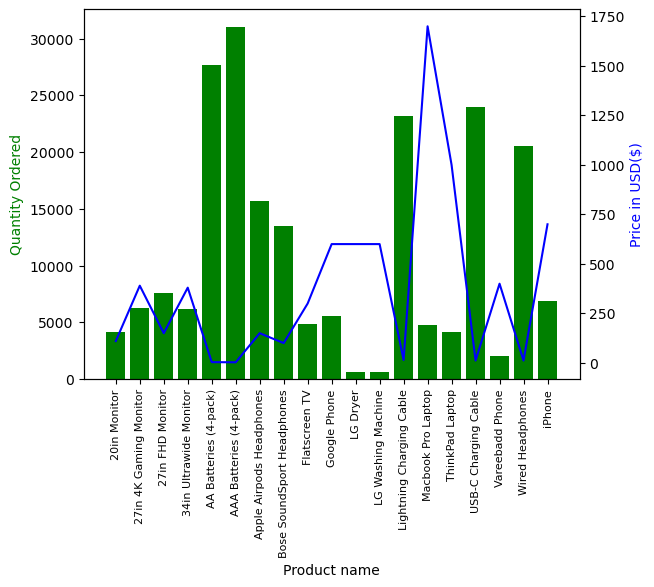

In [79]:
fig,ax1= plt.subplots()
ax2= ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product name')
ax1.set_ylabel("Quantity Ordered", color='g')
ax2.set_ylabel('Price in USD($)', color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)

plt.show()